# Marketing Outcome Using “Bank Marketing” UCI dataset

## Logistic Regression

### Collecting Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

bank_data = pd.read_csv("bank.csv", sep=";")
bank_data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [2]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 423.9+ KB


In [3]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


## Analyzing Data

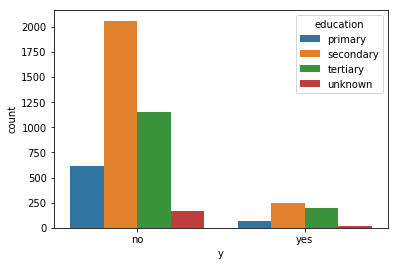

In [4]:
sns.countplot(x="y", hue="education", data=bank_data)

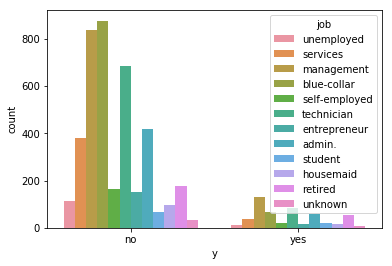

In [5]:
sns.countplot(x="y", hue="job", data=bank_data)

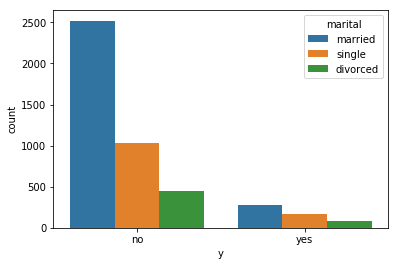

In [6]:
sns.countplot(x="y", hue="marital", data=bank_data)

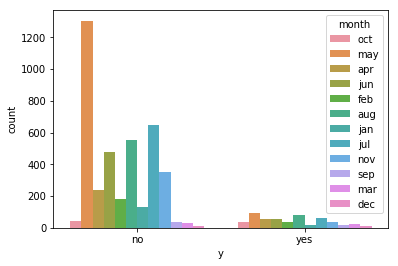

In [7]:
sns.countplot(x="y", hue="month", data=bank_data)

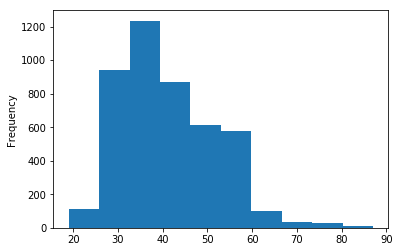

In [8]:
bank_data["age"].plot.hist()

## Data Wrangling

In [9]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
outcome= pd.get_dummies(bank_data['y'], drop_first=True, prefix='res')
outcome.head(3)

,res_yes
0,0
1,0
2,0


In [11]:
preoutcome= pd.get_dummies(bank_data['poutcome'], prefix='p')
preoutcome.drop(['p_unknown'],axis=1, inplace=True)
preoutcome.head(3)

,p_failure,p_other,p_success
0,0,0,0
1,1,0,0
2,1,0,0


In [12]:
mStatus= pd.get_dummies(bank_data['marital'], drop_first=True)
mStatus.head(3)

,married,single
0,1,0
1,1,0
2,0,1


In [13]:
Default= pd.get_dummies(bank_data['default'], drop_first=True, prefix='d')
Default.head(3)

,d_yes
0,0
1,0
2,0


In [14]:
Housing= pd.get_dummies(bank_data['housing'], drop_first=True, prefix='h')
Housing.head(3)

,h_yes
0,0
1,1
2,1


In [15]:
Loan= pd.get_dummies(bank_data['loan'], drop_first=True, prefix='l')
Loan.head(3)

,l_yes
0,0
1,1
2,0


In [16]:
Education= pd.get_dummies(bank_data['education'])
Education.drop(['unknown'],axis=1, inplace=True)
Education.head(3)

,primary,secondary,tertiary
0,1,0,0
1,0,1,0
2,0,0,1


In [17]:
Job= pd.get_dummies(bank_data['job'])
Job.drop(['unknown'],axis=1, inplace=True)
Job.head(3)

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0


In [18]:
Contact= pd.get_dummies(bank_data['contact'])
Contact.drop(['unknown'],axis=1, inplace=True)
Contact.head(3)

,cellular,telephone
0,1,0
1,1,0
2,1,0


In [19]:
Month= pd.get_dummies(bank_data['month'], drop_first=True)
Month.head(3)

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0


In [20]:
bank_data= pd.concat([bank_data,mStatus,Education,Job,Month,Default,Housing,Loan,Contact,preoutcome,outcome], axis=1)
bank_data.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,sep,d_yes,h_yes,l_yes,cellular,telephone,p_failure,p_other,p_success,res_yes
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,0,0,0,0,1,0,0,0,0,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,0,0,1,1,1,0,1,0,0,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,0,0,1,0,1,0,1,0,0,0


In [21]:
bank_data.drop(['y','poutcome','marital','contact','job','education','default','housing','loan','day','month'],axis=1, inplace=True)
bank_data.head(3)

,age,balance,duration,campaign,pdays,previous,married,single,primary,secondary,...,sep,d_yes,h_yes,l_yes,cellular,telephone,p_failure,p_other,p_success,res_yes
0,30,1787,79,1,-1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,33,4789,220,1,339,4,1,0,0,1,...,0,0,1,1,1,0,1,0,0,0
2,35,1350,185,1,330,1,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0


### Train and Test Data

In [22]:
X= bank_data.drop("res_yes", axis=1)
y= bank_data["res_yes"]

In [23]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [25]:
logmodel = LogisticRegression()

In [26]:
logmodel.fit(X_train, y_train)

f:\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
prediction = logmodel.predict(X_test)

In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [29]:
classification_report(y_test, prediction)

'              precision    recall  f1-score   support\n\n           0       0.91      0.97      0.94      1182\n           1       0.63      0.35      0.45       175\n\n   micro avg       0.89      0.89      0.89      1357\n   macro avg       0.77      0.66      0.69      1357\nweighted avg       0.87      0.89      0.88      1357\n'

In [30]:
confusion_matrix(y_test, prediction)

array([[1146,   36],
       [ 114,   61]], dtype=int64)

In [31]:
accuracy_score(y_test, prediction)

0.8894620486366986

## SVM

In [35]:
X= bank_data.drop("res_yes", axis=1)
y= bank_data["res_yes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [37]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

f:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [38]:
model.score(X_train, y_train)

0.9977876106194691

## PCA

In [39]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [59]:
df= bank_data.drop("res_yes", axis=1)

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [63]:
scaler=StandardScaler()
scaler.fit(df)

f:\python\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [64]:
scaled_data=scaler.transform(df)

f:\python\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [65]:
scaled_data

array([[-1.05626965,  0.12107186, -0.7118608 , ..., -0.34865158,
        -0.21344711, -0.1713814 ],
       [-0.77258281,  1.1186443 , -0.16919389, ...,  2.86819292,
        -0.21344711, -0.1713814 ],
       [-0.58345826, -0.02414438, -0.30389844, ...,  2.86819292,
        -0.21344711, -0.1713814 ],
       ...,
       [ 1.49691189, -0.37472364, -0.43475429, ..., -0.34865158,
        -0.21344711, -0.1713814 ],
       [-1.24539421, -0.09492484, -0.51942573, ..., -0.34865158,
         4.68500145, -0.1713814 ],
       [ 0.26760226, -0.09525714,  0.3118938 , ..., -0.34865158,
         4.68500145, -0.1713814 ]])

In [70]:
scaled_data.shape

(4521, 41)

In [100]:
pca= PCA(n_components=0.80,svd_solver='full')

In [101]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [102]:
x_pca=pca.transform(scaled_data)

In [104]:
# if 0 < n_components < 1 and svd_solver == ‘full’, selects the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components

In [103]:
x_pca.shape

(4521, 25)